# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

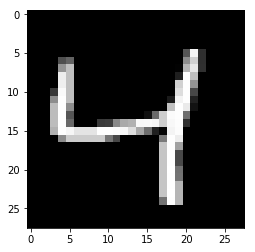

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784])
targets_ = tf.placeholder(tf.float32, [None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6912
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6853
Epoch: 1/20... Training loss: 0.6819
Epoch: 1/20... Training loss: 0.6775
Epoch: 1/20... Training loss: 0.6716
Epoch: 1/20... Training loss: 0.6642
Epoch: 1/20... Training loss: 0.6557
Epoch: 1/20... Training loss: 0.6469
Epoch: 1/20... Training loss: 0.6360
Epoch: 1/20... Training loss: 0.6246
Epoch: 1/20... Training loss: 0.6111
Epoch: 1/20... Training loss: 0.5989
Epoch: 1/20... Training loss: 0.5827
Epoch: 1/20... Training loss: 0.5698
Epoch: 1/20... Training loss: 0.5506
Epoch: 1/20... Training loss: 0.5327
Epoch: 1/20... Training loss: 0.5147
Epoch: 1/20... Training loss: 0.4971
Epoch: 1/20... Training loss: 0.4792
Epoch: 1/20... Training loss: 0.4632
Epoch: 1/20... Training loss: 0.4424
Epoch: 1/20... Training loss: 0.4316
Epoch: 1/20... Training loss: 0.4132
Epoch: 1/20... Training loss: 0.4038
Epoch: 1/20... Training loss: 0.3858
E

Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1806
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1789
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1735
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1801
Epoch: 1/20... Training loss: 0.1763
Epoch: 1/20... Training loss: 0.1767
Epoch: 1/20... Training loss: 0.1795
Epoch: 1/20... Training loss: 0.1773
Epoch: 1/20... Training loss: 0.1766
Epoch: 1/20... Training loss: 0.1774
Epoch: 1/20... Training loss: 0.1861
E

Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1498
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1444
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1416
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1451
E

Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1275
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1333
E

Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1232
E

Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1219
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1186
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1132
E

Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1110
E

Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1057
E

Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1048
E

Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0978
E

Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0936
E

Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0915
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0913
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0983
E

Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0883
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0993
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0978
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

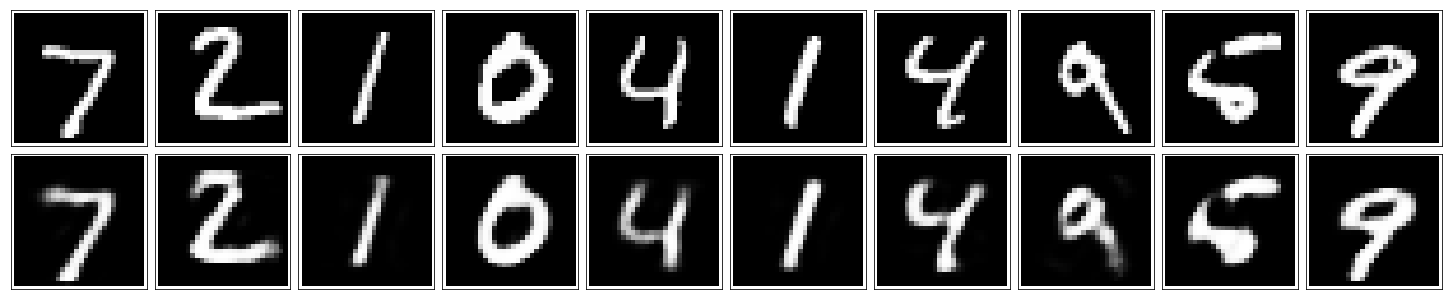

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.